In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms as trans
from torchvision import datasets

import matplotlib.pyplot as plt



In [2]:
train_set = datasets.FashionMNIST(
        root = './data/FashionMNIST',
        train = True,
        download = True,
        transform = trans.ToTensor(),
        )

test_set = datasets.FashionMNIST(
        root = './data/FashionMNIST',
        train = False,
        download = True,
        transform = trans.ToTensor()
        )



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



torch.Size([60000, 28, 28])


/Users/lipeiran/opt/anaconda3/envs/DeepLearning/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/lipeiran/opt/anaconda3/envs/DeepLearning/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


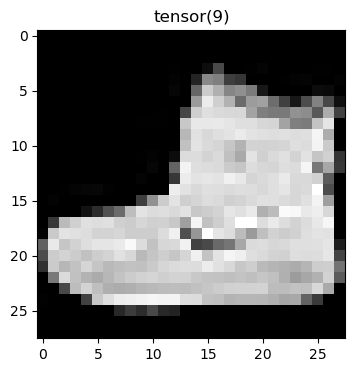

In [7]:
# transfer tensor to np
print(train_set.train_data.size())

plt.figure(figsize = (4, 4))
img = train_set.train_data[0].numpy()
plt.title(train_set.train_labels[0])
plt.imshow(img, cmap='gray')
plt.show()



In [9]:
train_set.data.__len__()

train_set.classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
        dataset = train_set,
        batch_size = batch_size,
        shuffle = True
        )

test_loader = torch.utils.data.DataLoader(
        dataset = test_set,
        batch_size = batch_size,
        shuffle = False
        )



In [15]:
train_imgs, train_labels = next(iter(train_loader))
train_imgs.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# TinyVGG
class TinyVGG(nn.Module):
    def __init__(self, in_channel: int, output_channel: int, hidden_unit: int):
        super(TinyVGG, self).__init__()
        self.block1 = nn.Sequential(nn.Conv2d(in_channel = in_channel, out_channel = hidden_unit,
                                              kernel_size = 3,
                                              stride = 1, padding = 1),
                                    nn.RelU(),
                                    nn.Conv2d(in_channel = hidden_unit,
                                              out_channel = hidden_unit,
                                              kernel_size = 3, stride = 1, padding = 1),
                                    nn.RelU(),
                                    nn.MaxPool2d(kernel_size = 2, stride = 2))

        self.block2 = nn.Sequential()